In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
%matplotlib inline

In [61]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# data_2d.csv

In [62]:
tab_url = "/content/drive/My Drive/Colab Notebooks/data6/data_2d.csv"
data_2d = pd.read_csv(tab_url, header=None)

In [71]:
data_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


### В таблиці 3 колонки, спробуемо кластеризувати та відобразити без зміни розмірності.

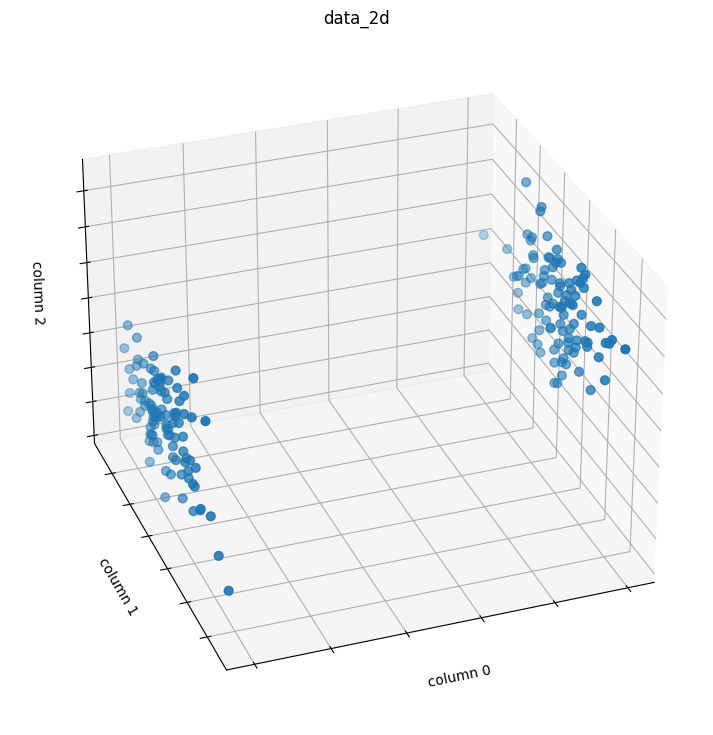

In [82]:
fig = plt.figure(1, figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    data_2d[0],
    data_2d[1],
    data_2d[2],
    # c=iris.target,
    s=40,
)

ax.set_title("data_2d")
ax.set_xlabel("column 0")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("column 1")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("column 2")
ax.zaxis.set_ticklabels([])

plt.show()

In [110]:
inertions = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(data_2d)
  inertions.append(kmeans.inertia_)

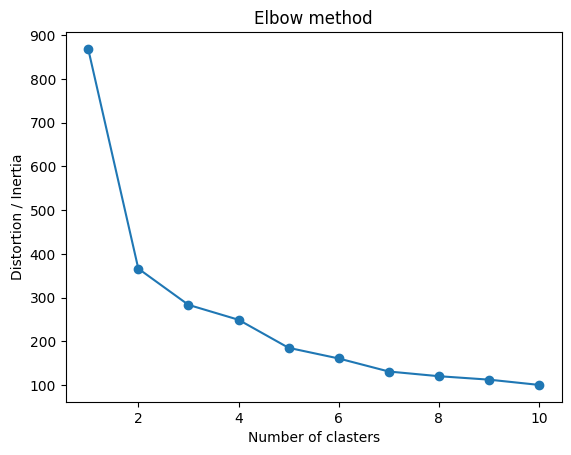

In [111]:
plt.plot(range(1,11), inertions, marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clasters")
plt.ylabel("Distortion / Inertia")
plt.show()

### Метод ліктя показує 2 кластери.

In [119]:
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data_2d)

KMeans(n_clusters=2, n_init='auto')

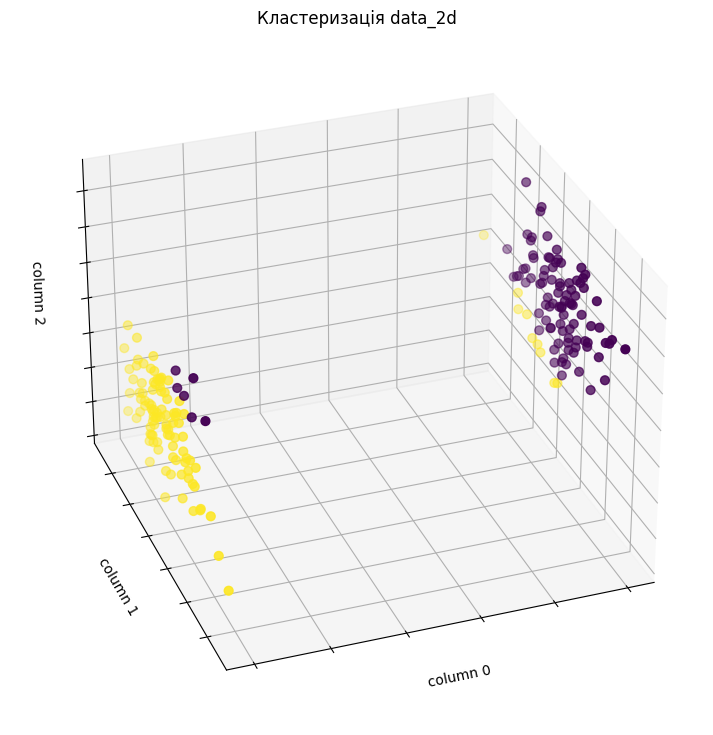

In [122]:
fig = plt.figure(1, figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    data_2d[0],
    data_2d[1],
    data_2d[2],
    c=kmeans.labels_,
    s=40,
)

ax.set_title("Кластеризація data_2d")
ax.set_xlabel("column 0")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("column 1")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("column 2")
ax.zaxis.set_ticklabels([])

plt.show()

### Якась дивна кластеризація 3-вимірного датасету, спробуємо знизити розмірність до 2-х.

In [87]:
data_2 = PCA(n_components=2).fit_transform(data_2d)

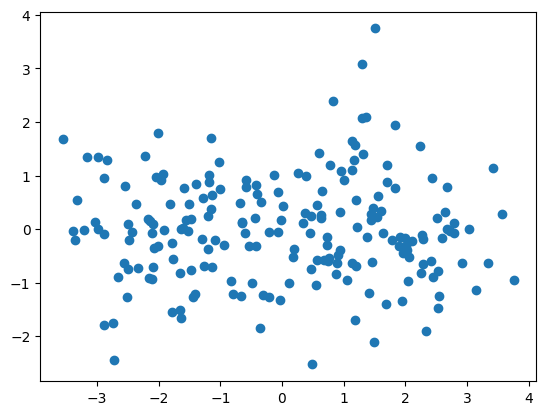

In [91]:
plt.scatter(data_2[:,0], data_2[:,1])
plt.show()

In [88]:
inertions = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(data_2)
  inertions.append(kmeans.inertia_)

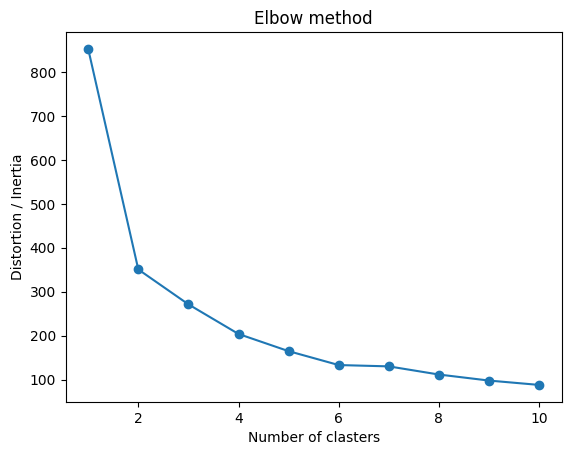

In [89]:
plt.plot(range(1,11), inertions, marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clasters")
plt.ylabel("Distortion / Inertia")
plt.show()

### Метод ліктя показує також 2 кластери.

In [93]:
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data_2d)

KMeans(n_clusters=2, n_init='auto')

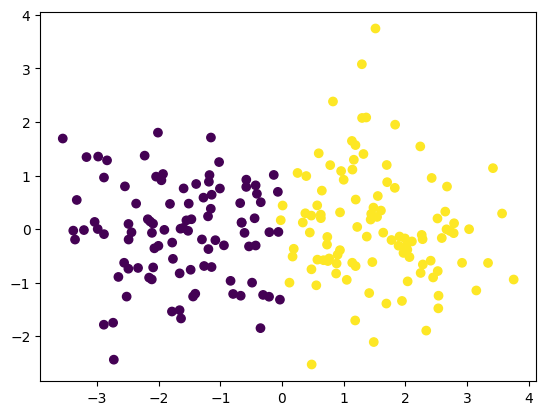

In [94]:
plt.scatter(data_2[:,0], data_2[:,1], c=kmeans.labels_)
plt.show()

### Для 2-мірного датасету розділення на 2 кластери доволі чисте.

--------------------
# mnist.csv

In [108]:
tab_url = "/content/drive/My Drive/Colab Notebooks/data6/mnist.csv"
mnist = pd.read_csv(tab_url, header=None)

In [109]:
mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Спочатку спробуємо зменшити розмірність до 3-х.

In [121]:
mnist_3 = PCA(n_components=3).fit_transform(mnist)

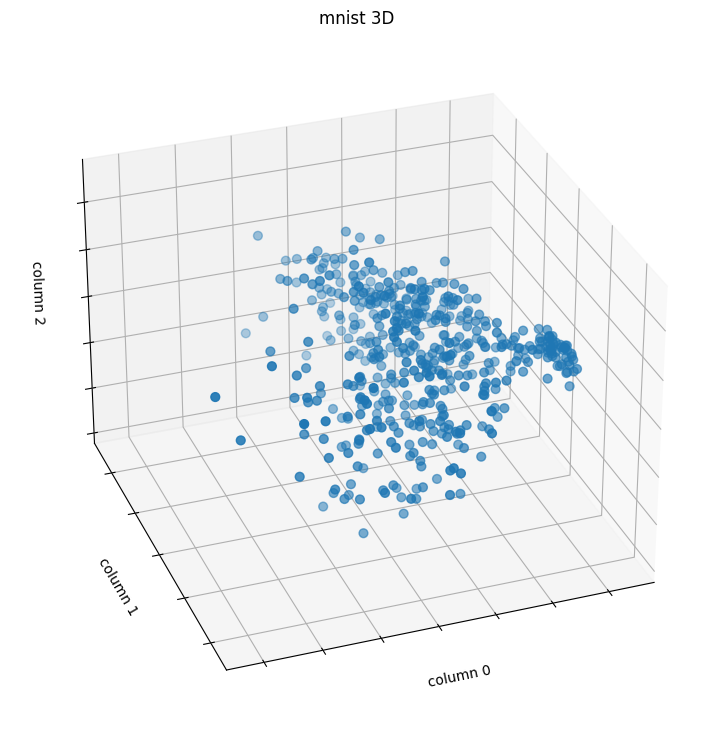

In [127]:
fig = plt.figure(1, figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    mnist_3[:,0],
    mnist_3[:,1],
    mnist_3[:,2],
    # c=iris.target,
    s=40,
)

ax.set_title("mnist 3D")
ax.set_xlabel("column 0")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("column 1")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("column 2")
ax.zaxis.set_ticklabels([])

plt.show()

In [128]:
inertions3 = []
for i in range(1, 11):
  kmeans3 = KMeans(n_clusters=i, n_init='auto')
  kmeans3.fit(mnist_3)
  inertions3.append(kmeans3.inertia_)

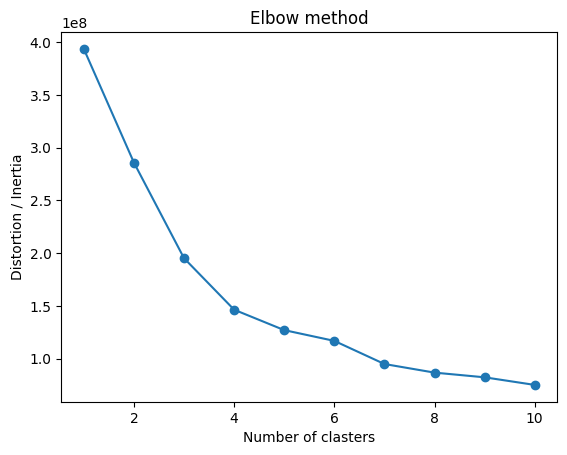

In [129]:
plt.plot(range(1,11), inertions3, marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clasters")
plt.ylabel("Distortion / Inertia")
plt.show()

### Метод ліктя показує 4 кластери.

In [132]:
kmeans3 = KMeans(n_clusters=4, n_init='auto')
kmeans3.fit(mnist_3)

KMeans(n_clusters=4, n_init='auto')

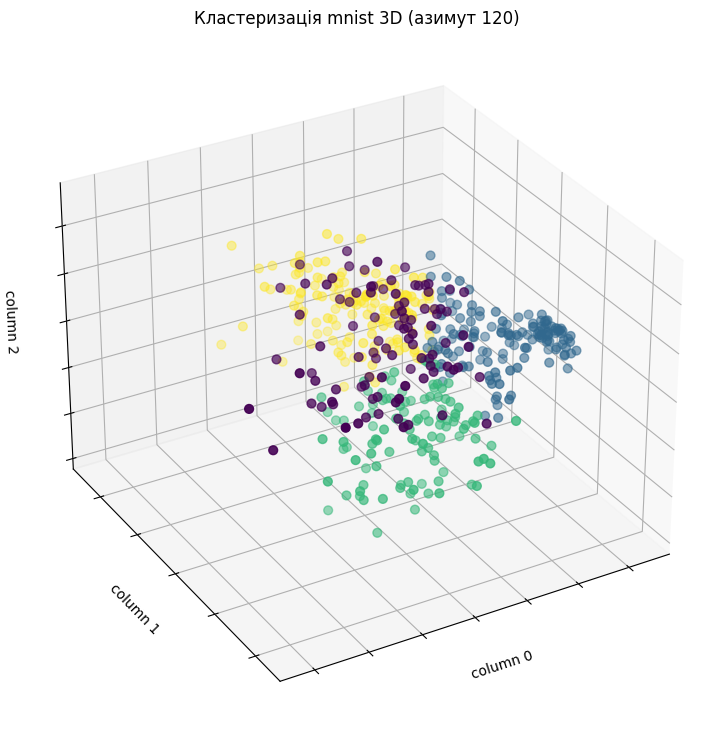

In [149]:
fig = plt.figure(1, figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=120)
ax.scatter(
    mnist_3[:,0],
    mnist_3[:,1],
    mnist_3[:,2],
    c=kmeans3.labels_,
    s=40,
)

ax.set_title("Кластеризація mnist 3D (азимут 120)")
ax.set_xlabel("column 0")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("column 1")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("column 2")
ax.zaxis.set_ticklabels([])

plt.show()

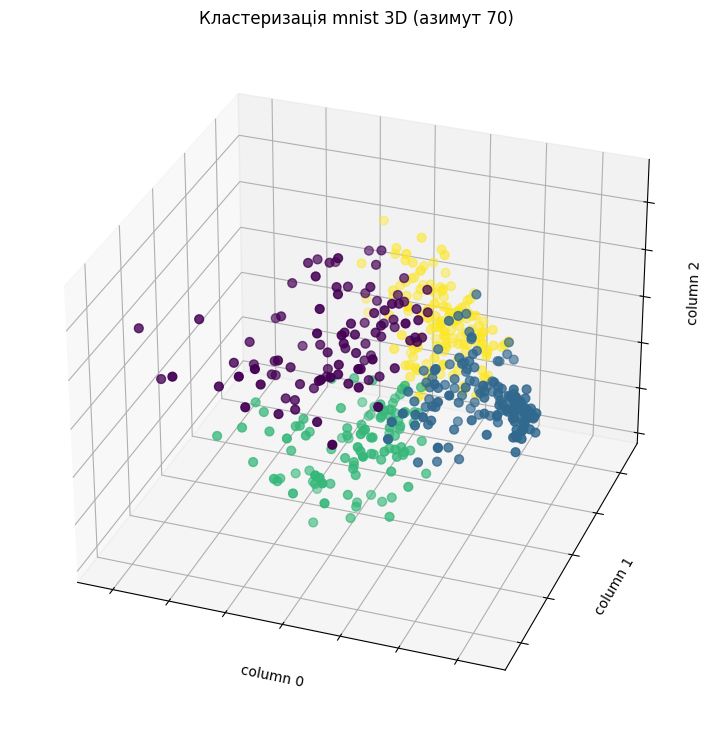

In [150]:
fig = plt.figure(1, figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=70)
ax.scatter(
    mnist_3[:,0],
    mnist_3[:,1],
    mnist_3[:,2],
    c=kmeans3.labels_,
    s=40,
)

ax.set_title("Кластеризація mnist 3D (азимут 70)")
ax.set_xlabel("column 0")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("column 1")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("column 2")
ax.zaxis.set_ticklabels([])

plt.show()

### З двох ракурсів видно, що розділення 3-вимірного датасету на 4 кластери доволі чисте.
------
### Тепер спробуємо знизити розмірнисть до 2-х.

In [134]:
mnist_2 = PCA(n_components=2).fit_transform(mnist)

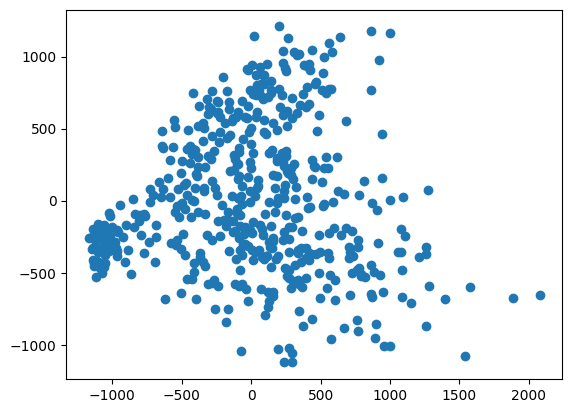

In [135]:
plt.scatter(mnist_2[:,0], mnist_2[:,1])
plt.show()

In [136]:
inertions2 = []
for i in range(1, 11):
  kmeans2 = KMeans(n_clusters=i, n_init='auto')
  kmeans2.fit(mnist_2)
  inertions2.append(kmeans2.inertia_)

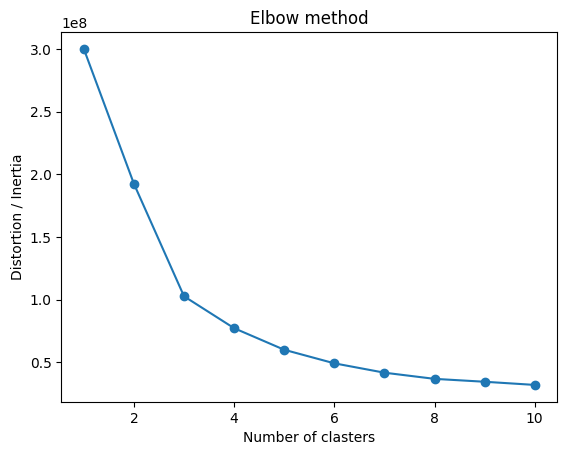

In [137]:
plt.plot(range(1,11), inertions2, marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clasters")
plt.ylabel("Distortion / Inertia")
plt.show()

### Тепер метод ліктя показує 3 кластери.

In [138]:
kmeans2 = KMeans(n_clusters=3, n_init='auto')
kmeans2.fit(mnist_2)

KMeans(n_clusters=3, n_init='auto')

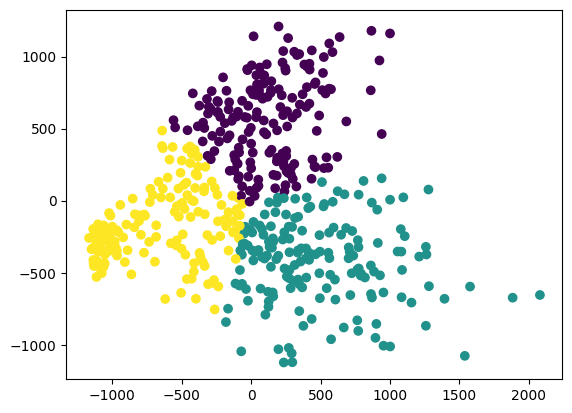

In [139]:
plt.scatter(mnist_2[:,0], mnist_2[:,1], c=kmeans2.labels_)
plt.show()

### Розділення 2-вимірного датасету на 3 кластери теж доволі чисте.